In [1]:
#TUSHAR GAURAV
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('OLA_trips_dataset (1).csv')
df.head()

booking id  booking_date_time  gender     month day_of_week  time_of_day   
0  1890061540        43249.91944    Male       May         Tue     0.919444  \
1  1542148932        43153.92500  Female  February         Thu     0.925000   
2  1672692603        43194.88264  Female     April         Wed     0.882639   
3  1925600201        43258.93264  Female      June         Thu     0.932639   
4  1530845664        43150.47986    Male  February         Mon     0.479861   

   distance_travelled  time_taken               reason  toll       category   
0                  17        58.0  Office to/from Home     0           Mini  \
1                  18        43.0      Late Night Ride     0           Mini   
2                   2         5.0  Office to/from Home     0          Prime   
3                  15        49.0  Office to/from Home    35          Micro   
4                  46         0.0         Office Event     0  Prime Rentals   

   commission_base_cost  driver_base_cost  total_tax  total_trip_cost  ratings  
0                 57.73            230.91      21.94           311.00        3  
1                 52.04            208.16      19.76           279.96        5  
2                 19.70             78.81       7.49           106.00        5  
3                 51.24            239.96      21.22           312.00        5  
4                195.92            783.68      74.45          1054.05        4

In [6]:
df.shape

(4950, 16)

In [7]:
df.describe()

booking_date_time  time_of_day  distance_travelled   time_taken   
count        4950.000000  4950.000000         4950.000000  4950.000000  \
mean        43195.816098     0.686199           11.713333    35.126137   
std            53.621694     0.373218           10.338660    25.592958   
min         43101.043060     0.000000            0.000000     0.000000   
25%         43147.922225     0.273090            4.000000     7.000000   
50%         43195.875000     0.900000            8.500000    35.000000   
75%         43245.182465     0.936806           16.000000    50.000000   
max         43281.198610     0.999306           66.000000   192.000000   

              toll  commission_base_cost  driver_base_cost    total_tax   
count  4950.000000           4950.000000       4950.000000  4950.000000  \
mean      5.408081             47.598505        196.162053    18.381004   
std      15.915681             37.155192        155.368659    14.408632   
min       0.000000              0.000000         26.020000     2.470000   
25%       0.000000             22.625000         90.865000     8.620000   
50%       0.000000             37.615000        151.145000    14.355000   
75%       0.000000             58.517500        242.680000    22.687500   
max     140.000000            359.240000       1369.600000   129.120000   

       total_trip_cost      ratings  
count      4950.000000  4950.000000  
mean        262.074463     3.734949  
std         206.440318     1.172378  
min          34.000000     1.000000  
25%         122.000000     3.000000  
50%         203.000000     4.000000  
75%         324.750000     5.000000  
max        1828.120000     5.000000

In [8]:
df.isnull().sum()

booking id               0
booking_date_time        0
gender                   0
month                    0
day_of_week              0
time_of_day              0
distance_travelled       0
time_taken               0
reason                  93
toll                     0
category                 0
commission_base_cost     0
driver_base_cost         0
total_tax                0
total_trip_cost          0
ratings                  0
dtype: int64

In [10]:
distance_travelled = pd.DataFrame(df['distance_travelled'].value_counts())
distance_travelled

count
distance_travelled       
2                     559
4                     375
3                     333
5                     309
7                     272
...                   ...
55                      1
40                      1
47                      1
39                      1
66                      1

[62 rows x 1 columns]

In [12]:
sns.countplot(df['distance_travelled'])

<Axes: ylabel='count'>

In [14]:
df.drop(['gender' , 'category'] , axis = 1)

booking id  booking_date_time     month day_of_week  time_of_day   
0         1890061540        43249.91944       May         Tue     0.919444  \
1         1542148932        43153.92500  February         Thu     0.925000   
2         1672692603        43194.88264     April         Wed     0.882639   
3         1925600201        43258.93264      June         Thu     0.932639   
4         1530845664        43150.47986  February         Mon     0.479861   
...              ...                ...       ...         ...          ...   
4945      1901877370        43252.90972      June         Fri     0.909722   
4946      1867091987        43243.93333       May         Wed     0.933333   
4947      1747322670        43214.97153     April         Tue     0.971528   
4948      1635338680        43183.00833     March         Sat     0.008333   
4949  OSN_1039565727        43270.98681      June         Tue     0.986806   

      distance_travelled  time_taken               reason  toll   
0                     17       58.00  Office to/from Home     0  \
1                     18       43.00      Late Night Ride     0   
2                      2        5.00  Office to/from Home     0   
3                     15       49.00  Office to/from Home    35   
4                     46        0.00         Office Event     0   
...                  ...         ...                  ...   ...   
4945                  29       90.00  Office to/from Home    35   
4946                   1        2.00  Office to/from Home     0   
4947                   8       34.00  Office to/from Home     0   
4948                  10       30.00  Office to/from Home     0   
4949                   6       17.58  Office to/from Home     0   

      commission_base_cost  driver_base_cost  total_tax  total_trip_cost   
0                    57.73            230.91      21.94           311.00  \
1                    52.04            208.16      19.76           279.96   
2                    19.70             78.81       7.49           106.00   
3                    51.24            239.96      21.22           312.00   
4                   195.92            783.68      74.45          1054.05   
...                    ...               ...        ...              ...   
4945                113.75            490.02      44.97           649.00   
4946                 15.84             63.36       6.02            85.00   
4947                 33.78            135.13      12.84           182.00   
4948                 43.29            173.17      16.45           232.91   
4949                 28.99            115.97      11.02           156.00   

      ratings  
0           3  
1           5  
2           5  
3           5  
4           4  
...       ...  
4945        3  
4946        4  
4947        5  
4948        5  
4949        5  

[4950 rows x 14 columns]

In [15]:
df.drop(['gender' , 'reason'] , axis = 1)

booking id  booking_date_time     month day_of_week  time_of_day   
0         1890061540        43249.91944       May         Tue     0.919444  \
1         1542148932        43153.92500  February         Thu     0.925000   
2         1672692603        43194.88264     April         Wed     0.882639   
3         1925600201        43258.93264      June         Thu     0.932639   
4         1530845664        43150.47986  February         Mon     0.479861   
...              ...                ...       ...         ...          ...   
4945      1901877370        43252.90972      June         Fri     0.909722   
4946      1867091987        43243.93333       May         Wed     0.933333   
4947      1747322670        43214.97153     April         Tue     0.971528   
4948      1635338680        43183.00833     March         Sat     0.008333   
4949  OSN_1039565727        43270.98681      June         Tue     0.986806   

      distance_travelled  time_taken  toll       category   
0                     17       58.00     0           Mini  \
1                     18       43.00     0           Mini   
2                      2        5.00     0          Prime   
3                     15       49.00    35          Micro   
4                     46        0.00     0  Prime Rentals   
...                  ...         ...   ...            ...   
4945                  29       90.00    35          Micro   
4946                   1        2.00     0           Mini   
4947                   8       34.00     0           Mini   
4948                  10       30.00     0          Prime   
4949                   6       17.58     0           Mini   

      commission_base_cost  driver_base_cost  total_tax  total_trip_cost   
0                    57.73            230.91      21.94           311.00  \
1                    52.04            208.16      19.76           279.96   
2                    19.70             78.81       7.49           106.00   
3                    51.24            239.96      21.22           312.00   
4                   195.92            783.68      74.45          1054.05   
...                    ...               ...        ...              ...   
4945                113.75            490.02      44.97           649.00   
4946                 15.84             63.36       6.02            85.00   
4947                 33.78            135.13      12.84           182.00   
4948                 43.29            173.17      16.45           232.91   
4949                 28.99            115.97      11.02           156.00   

      ratings  
0           3  
1           5  
2           5  
3           5  
4           4  
...       ...  
4945        3  
4946        4  
4947        5  
4948        5  
4949        5  

[4950 rows x 14 columns]

In [16]:
attrition_dummies = pd.get_dummies(df['distance_travelled'])
attrition_dummies.head()

0      1      2      3      4      5      6      7      8      9   ...   
0  False  False  False  False  False  False  False  False  False  False  ...  \
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False   True  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

      55     56     57     58     61     62     63     64     65     66  
0  False  False  False  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  False  False  False  
4  False  False  False  False  False  False  False  False  False  False  

[5 rows x 62 columns]

In [17]:
attrition_dummies = pd.get_dummies(df['month'])
attrition_dummies.head()

April  February  January   June  March    May
0  False     False    False  False  False   True
1  False      True    False  False  False  False
2   True     False    False  False  False  False
3  False     False    False   True  False  False
4  False      True    False  False  False  False

In [18]:
attrition_dummies = pd.get_dummies(df['category'])
attrition_dummies.head()

Lux  Micro   Mini  Mini Rentals   Play  Prime  Prime Play   
0  False  False   True         False  False  False       False  \
1  False  False   True         False  False  False       False   
2  False  False  False         False  False   True       False   
3  False   True  False         False  False  False       False   
4  False  False  False         False  False  False       False   

   Prime Play Rentals  Prime Rentals  SUV Rentals  Sedan  
0               False          False        False  False  
1               False          False        False  False  
2               False          False        False  False  
3               False          False        False  False  
4               False           True        False  False

In [19]:
df = pd.concat([df, distance_travelled] , axis = 1)
df.head()

booking id  booking_date_time  gender     month day_of_week  time_of_day   
0  1890061540        43249.91944    Male       May         Tue     0.919444  \
1  1542148932        43153.92500  Female  February         Thu     0.925000   
2  1672692603        43194.88264  Female     April         Wed     0.882639   
3  1925600201        43258.93264  Female      June         Thu     0.932639   
4  1530845664        43150.47986    Male  February         Mon     0.479861   

   distance_travelled  time_taken               reason  toll       category   
0                  17        58.0  Office to/from Home     0           Mini  \
1                  18        43.0      Late Night Ride     0           Mini   
2                   2         5.0  Office to/from Home     0          Prime   
3                  15        49.0  Office to/from Home    35          Micro   
4                  46         0.0         Office Event     0  Prime Rentals   

   commission_base_cost  driver_base_cost  total_tax  total_trip_cost   
0                 57.73            230.91      21.94           311.00  \
1                 52.04            208.16      19.76           279.96   
2                 19.70             78.81       7.49           106.00   
3                 51.24            239.96      21.22           312.00   
4                195.92            783.68      74.45          1054.05   

   ratings  count  
0        3   12.0  
1        5  154.0  
2        5  559.0  
3        5  333.0  
4        4  375.0

In [28]:
df.head(5)

booking id  booking_date_time  gender     month day_of_week  time_of_day   
0  1890061540        43249.91944    Male       May         Tue     0.919444  \
1  1542148932        43153.92500  Female  February         Thu     0.925000   
2  1672692603        43194.88264  Female     April         Wed     0.882639   
3  1925600201        43258.93264  Female      June         Thu     0.932639   
4  1530845664        43150.47986    Male  February         Mon     0.479861   

   distance_travelled  time_taken               reason  toll       category   
0                  17        58.0  Office to/from Home     0           Mini  \
1                  18        43.0      Late Night Ride     0           Mini   
2                   2         5.0  Office to/from Home     0          Prime   
3                  15        49.0  Office to/from Home    35          Micro   
4                  46         0.0         Office Event     0  Prime Rentals   

   commission_base_cost  driver_base_cost  total_tax  total_trip_cost   
0                 57.73            230.91      21.94           311.00  \
1                 52.04            208.16      19.76           279.96   
2                 19.70             78.81       7.49           106.00   
3                 51.24            239.96      21.22           312.00   
4                195.92            783.68      74.45          1054.05   

   ratings  count  
0        3   12.0  
1        5  154.0  
2        5  559.0  
3        5  333.0  
4        4  375.0

In [29]:
df.dtypes

booking id               object
booking_date_time       float64
gender                   object
month                    object
day_of_week              object
time_of_day             float64
distance_travelled        int64
time_taken              float64
reason                   object
toll                      int64
category                 object
commission_base_cost    float64
driver_base_cost        float64
total_tax               float64
total_trip_cost         float64
ratings                   int64
count                   float64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   booking id            4950 non-null   object 
 1   booking_date_time     4950 non-null   float64
 2   gender                4950 non-null   object 
 3   month                 4950 non-null   object 
 4   day_of_week           4950 non-null   object 
 5   time_of_day           4950 non-null   float64
 6   distance_travelled    4950 non-null   int64  
 7   time_taken            4950 non-null   float64
 8   reason                4857 non-null   object 
 9   toll                  4950 non-null   int64  
 10  category              4950 non-null   object 
 11  commission_base_cost  4950 non-null   float64
 12  driver_base_cost      4950 non-null   float64
 13  total_tax             4950 non-null   float64
 14  total_trip_cost       4950 non-null   float64
 15  ratings              

In [31]:
(df.isnull().sum()/len(df))

booking id              0.000000
booking_date_time       0.000000
gender                  0.000000
month                   0.000000
day_of_week             0.000000
time_of_day             0.000000
distance_travelled      0.000000
time_taken              0.000000
reason                  0.018788
toll                    0.000000
category                0.000000
commission_base_cost    0.000000
driver_base_cost        0.000000
total_tax               0.000000
total_trip_cost         0.000000
ratings                 0.000000
count                   0.987475
dtype: float64

In [32]:
df = df.dropna()

In [33]:
(df.isnull().sum()/len(df))

booking id              0.0
booking_date_time       0.0
gender                  0.0
month                   0.0
day_of_week             0.0
time_of_day             0.0
distance_travelled      0.0
time_taken              0.0
reason                  0.0
toll                    0.0
category                0.0
commission_base_cost    0.0
driver_base_cost        0.0
total_tax               0.0
total_trip_cost         0.0
ratings                 0.0
count                   0.0
dtype: float64

In [34]:
df = df.drop('category', axis = 1)

In [36]:
df = df.drop('distance_travelled', axis = 1)

In [37]:
df = df.drop('gender', axis = 1)

<Axes: xlabel='total_tax', ylabel='Count'>

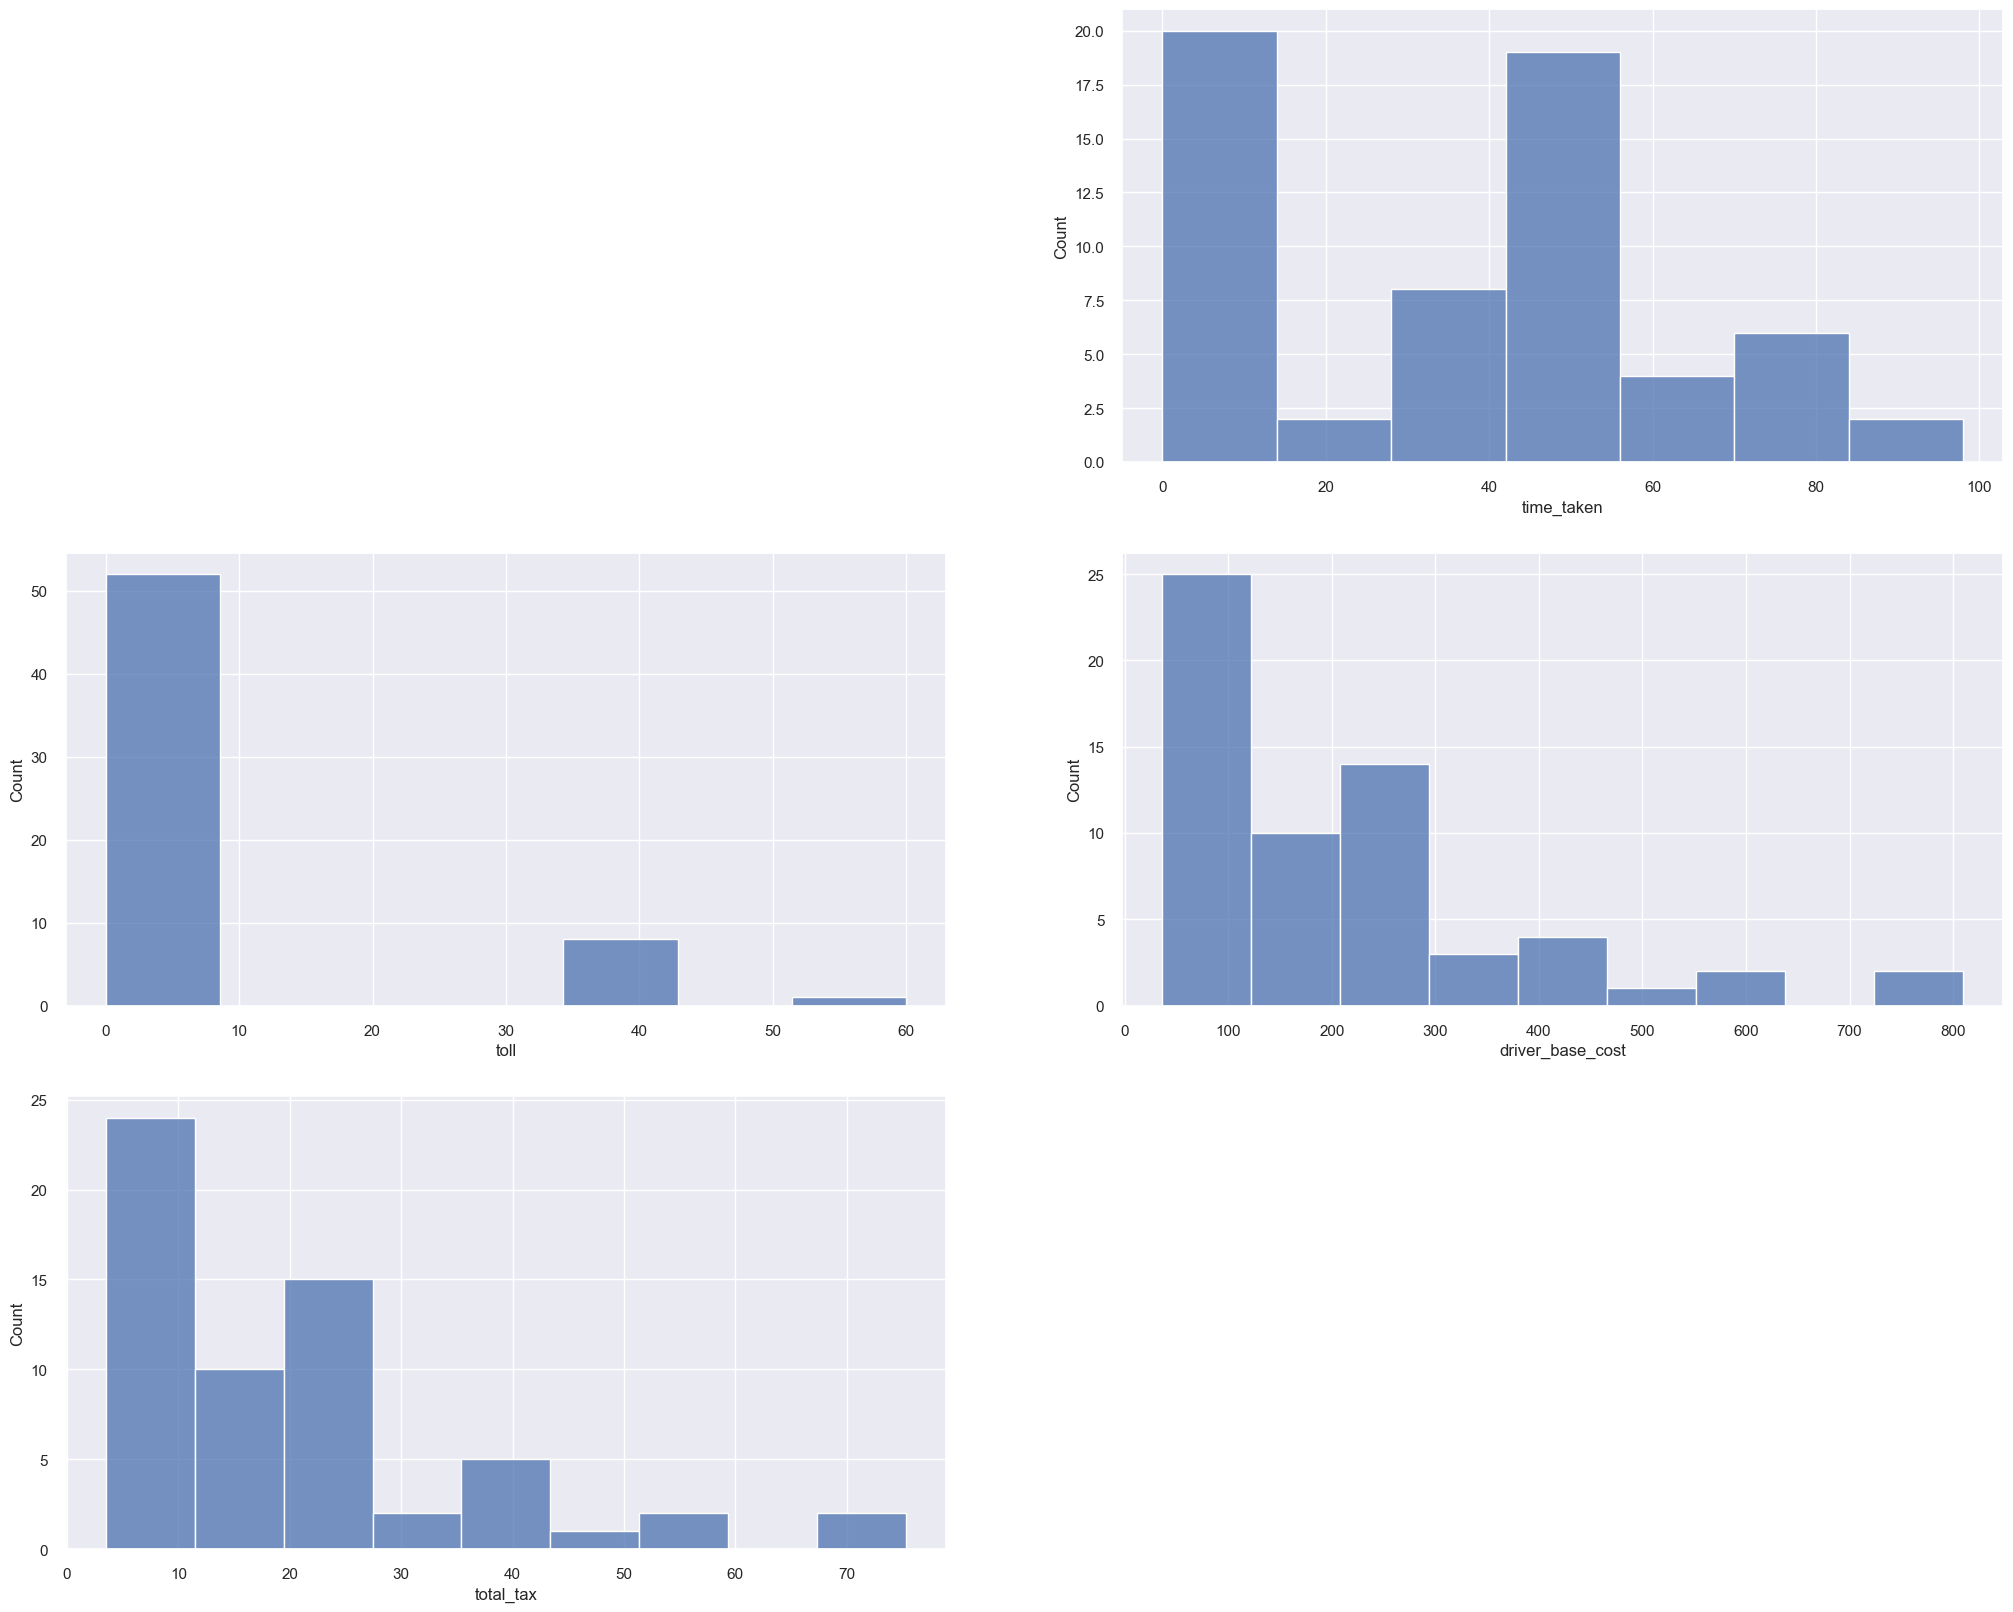

In [40]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)
plt.subplot(3,2,2)
sns.histplot(df['time_taken'], kde = False)

plt.subplot(3,2,3)
sns.histplot(df['toll'], kde = False)

plt.subplot(3,2,4)
sns.histplot(df['driver_base_cost'], kde = False)

plt.subplot(3,2,5)
sns.histplot(df['total_tax'], kde = False)